- Start with general stuff

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import h5py, os
from tqdm import tqdm

import sys
sys.path.append('d:\\documents\\coding')
from utilities import get_keys, IV_T_mapping, bin_y_over_x, IV_T_plotting, IV_mapping, T_mapping
import utilities.corporate_design_colors_v3 as cpd

no style found


# Color Package (v4)


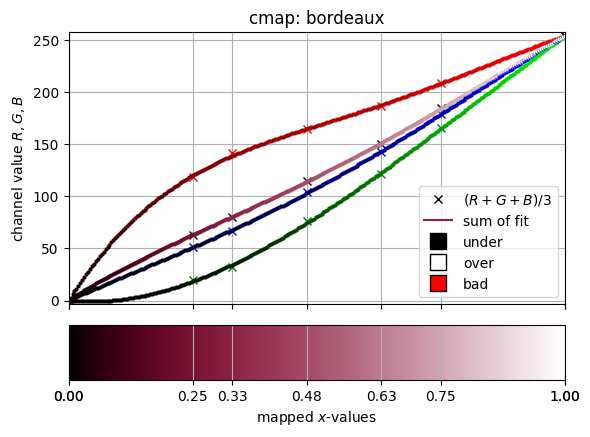

In [1]:
%matplotlib inline
'''version from 15.12.23
author: Oliver Irtenkauf

features: Coporate Design Colors of University Konstanz
and inverse colors for more contrast

'''
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# seeblau
x = np.array([  0,  30,  40,  50,  70,  85, 100])/100
R = np.array([-356,-89,   0,  89, 166, 204, 255])/256
G = np.array([  0, 142, 169, 199, 225, 238, 255])/256
B = np.array([  0, 206, 224, 235, 244, 249, 255])/256

polyRcoeff = np.polyfit(x, R, deg = 4)
polyGcoeff = np.polyfit(x, G, deg = 4)
polyBcoeff = np.polyfit(x, B, deg = 4)

DATABASE = {
    'seeblau': {
        'x': x,
        'R': R,
        'G': G,
        'B': B,
        'polyRcoeff': polyRcoeff,
        'polyGcoeff': polyGcoeff,
        'polyBcoeff': polyBcoeff,
    },
    'peach': {
        'x': np.array([  0,  35,  40,  50,  65,  80, 100])/100,
        'R': np.array([  0, 255, 255, 255, 255, 255, 255])/256,
        'G': np.array([  0, 142, 160, 184, 207, 226, 255])/256,
        'B': np.array([  0, 123, 144, 172, 199, 221, 255])/256,
        'polyRcoeff': np.polyfit(np.array([  0,  35,  40,  50,  65,  80, 100])/100, np.array([  0, 255, 255, 255, 255, 255, 255])/256, deg = 4),
        'polyGcoeff': np.polyfit(np.array([  0,  35,  40,  50,  65,  80, 100])/100, np.array([  0, 142, 160, 184, 207, 226, 255])/256, deg = 4),
        'polyBcoeff': np.polyfit(np.array([  0,  35,  40,  50,  65,  80, 100])/100, np.array([  0, 123, 144, 172, 199, 221, 255])/256, deg = 4),
    },
    'grau': {
        'x': np.array([  0,  30,  40,  50,  60,  80, 100])/100,
        'R': np.array([  0,  77, 115, 154, 184, 225, 255])/256,
        'G': np.array([  0,  80, 120, 160, 188, 226, 255])/256,
        'B': np.array([  0,  84, 126, 167, 193, 229, 255])/256,
        'polyRcoeff': np.polyfit(np.array([  0,  30,  40,  50,  60,  80, 100])/100, np.array([  0,  77, 115, 154, 184, 225, 255])/256, deg = 4),
        'polyGcoeff': np.polyfit(np.array([  0,  30,  40,  50,  60,  80, 100])/100, np.array([  0,  80, 120, 160, 188, 226, 255])/256, deg = 4),
        'polyBcoeff': np.polyfit(np.array([  0,  30,  40,  50,  60,  80, 100])/100, np.array([  0,  84, 126, 167, 193, 229, 255])/256, deg = 4),
    },
    'petrol': {
        'x': np.array([  0,  28,  33,  45,  60,  75, 100])/100,
        'R': np.array([  0,   3,   7,  57, 106, 156, 255])/256,
        'G': np.array([  0,  95, 113, 141, 170, 198, 255])/256,
        'B': np.array([  0, 114, 135, 159, 183, 207, 255])/256,
        'polyRcoeff': np.polyfit(np.array([  0,  28,  33,  45,  60,  75, 100])/100, np.array([  0,   3,   7,  57, 106, 156, 255])/256, deg = 4),
        'polyGcoeff': np.polyfit(np.array([  0,  28,  33,  45,  60,  75, 100])/100, np.array([  0,  95, 113, 141, 170, 198, 255])/256, deg = 4),
        'polyBcoeff': np.polyfit(np.array([  0,  28,  33,  45,  60,  75, 100])/100, np.array([  0, 114, 135, 159, 183, 207, 255])/256, deg = 4),
    },
    'seegrün': {
        'x': np.array([  0,  25,  30,  35,  60,  75, 100])/100,
        'R': np.array([  0,   6,  10,  10,  84, 113, 255])/256,
        'G': np.array([  0, 126, 144, 163, 191, 209, 255])/256,
        'B': np.array([  0, 121, 134, 152, 183, 204, 255])/256,
        'polyRcoeff': np.polyfit(np.array([  0,  25,  30,  35,  60,  75, 100])/100, np.array([  0,   6,  10,  10,  84, 113, 255])/256, deg = 4),
        'polyGcoeff': np.polyfit(np.array([  0,  25,  30,  35,  60,  75, 100])/100, np.array([  0, 126, 144, 163, 191, 209, 255])/256, deg = 4),
        'polyBcoeff': np.polyfit(np.array([  0,  25,  30,  35,  60,  75, 100])/100, np.array([  0, 121, 134, 152, 183, 204, 255])/256, deg = 4),
    },
    'karpfenblau': {
        'x': np.array([  0,  25,  35,  45,  60,  75, 100])/100,
        'R': np.array([  0,  50,  62,  88, 130, 180, 255])/256,
        'G': np.array([  0,  67,  84, 107, 144, 188, 255])/256,
        'B': np.array([  0, 118, 150, 164, 187, 214, 255])/256,
        'polyRcoeff': np.polyfit(np.array([  0,  25,  35,  45,  60,  75, 100])/100, np.array([  0,  50,  62,  88, 130, 180, 255])/256, deg = 4),
        'polyGcoeff': np.polyfit(np.array([  0,  25,  35,  45,  60,  75, 100])/100, np.array([  0,  67,  84, 107, 144, 188, 255])/256, deg = 4),
        'polyBcoeff': np.polyfit(np.array([  0,  25,  35,  45,  60,  75, 100])/100, np.array([  0, 118, 150, 164, 187, 214, 255])/256, deg = 4),
    },
    'pinky': {
        'x': np.array([  0,  25,  35,  45,  55,  75, 100])/100,
        'R': np.array([  0, 202, 224, 230, 236, 243, 255])/256,
        'G': np.array([  0,  74,  96, 128, 160, 191, 255])/256,
        'B': np.array([  0, 104, 126, 152, 178, 203, 255])/256,
        'polyRcoeff': np.polyfit(np.array([  0,  25,  35,  45,  55,  75, 100])/100, np.array([  0, 202, 224, 230, 236, 243, 255])/256, deg = 4),
        'polyGcoeff': np.polyfit(np.array([  0,  25,  35,  45,  55,  75, 100])/100, np.array([  0,  74,  96, 128, 160, 191, 255])/256, deg = 4),
        'polyBcoeff': np.polyfit(np.array([  0,  25,  35,  45,  55,  75, 100])/100, np.array([  0, 104, 126, 152, 178, 203, 255])/256, deg = 4),
    },
    'bordeaux': {
        'x': np.array([  0,  25,  33,  48,  63,  75, 100])/100,
        'R': np.array([  0, 119, 142, 165, 188, 210, 255])/256,
        'G': np.array([  0,  20,  32,  77, 122, 166, 255])/256,
        'B': np.array([  0,  52,  67, 105, 143, 180, 255])/256,
        'polyRcoeff': np.polyfit(np.array([  0,  25,  33,  48,  63,  75, 100])/100, np.array([  0, 119, 142, 165, 188, 210, 255])/256, deg = 4),
        'polyGcoeff': np.polyfit(np.array([  0,  25,  33,  48,  63,  75, 100])/100, np.array([  0,  20,  32,  77, 122, 166, 255])/256, deg = 4),
        'polyBcoeff': np.polyfit(np.array([  0,  25,  33,  48,  63,  75, 100])/100, np.array([  0,  52,  67, 105, 143, 180, 255])/256, deg = 4),
    },
    'amber': {
        'x': x,
        'R': B,
        'G': G,
        'B': R,
        'polyRcoeff': polyBcoeff,
        'polyGcoeff': polyGcoeff,
        'polyBcoeff': polyRcoeff,
    },
    'magenta': {
        'x': x,
        'R': B,
        'G': R,
        'B': G,
        'polyRcoeff': polyBcoeff,
        'polyGcoeff': polyRcoeff,
        'polyBcoeff': polyGcoeff,
    },
    'mint': {
        'x': x,
        'R': R,
        'G': B,
        'B': G,
        'polyRcoeff': polyRcoeff,
        'polyGcoeff': polyBcoeff,
        'polyBcoeff': polyGcoeff,
    },
    'lila': {
        'x': x,
        'R': G,
        'G': R,
        'B': B,
        'polyRcoeff': polyGcoeff,
        'polyGcoeff': polyRcoeff,
        'polyBcoeff': polyBcoeff,
    },
    'lime': {
        'x': x,
        'R': G,
        'G': B,
        'B': R,
        'polyRcoeff': polyGcoeff,
        'polyGcoeff': polyBcoeff,
        'polyBcoeff': polyRcoeff,
    },
}



def cmap(
        color = 'seeblau', 
        inverse = False, 
        clim = (0,1), 
        under = 'black', 
        over = 'white', 
        bad = 'red',
        plot = False,
        num = 0,
        ):
    x = np.linspace(clim[0],clim[1],256)
    polyR = np.poly1d(DATABASE[color]['polyRcoeff'])(x)
    polyG = np.poly1d(DATABASE[color]['polyGcoeff'])(x)
    polyB = np.poly1d(DATABASE[color]['polyBcoeff'])(x)
    mapped = np.array([polyR.T, polyG.T, polyB.T, np.ones(256).T]).T
    mapped[mapped<=0]=0
    mapped[mapped>=1]=1
    if plot:
        plot_cmap(x, mapped, 
                  over=over, under=under, bad=bad,
                  clim=clim, color=color, num=num)
    if inverse:
        mapped = np.flip(mapped, axis=0)
        over, under = under, over
    colormap = ListedColormap(mapped)
    colormap.set_over(color = over)
    colormap.set_under(color = under)
    colormap.set_bad(color = bad)
    return colormap

def plot_cmap(
        x,
        mapped,
        over,
        under,
        bad,
        clim=(0,1),
        color = 'seeblau', 
        num = 1,
        save=False,
        ):
    plt.close(num)
    fig, [ax, ax_clb, ax_] = plt.subplots(3,1, num=num, 
                            gridspec_kw={"height_ratios":[5,1,.002]})
    
    ax.plot(DATABASE[color]['x'], DATABASE[color]['R']*255, 'xr')
    ax.plot(DATABASE[color]['x'], DATABASE[color]['G']*255, 'xg')
    ax.plot(DATABASE[color]['x'], DATABASE[color]['B']*255, 'xb')
    ax.plot(DATABASE[color]['x'], (DATABASE[color]['R']+DATABASE[color]['G']+DATABASE[color]['B'])/3*255, 'xk', label=f'$(R+G+B)/3$')

    ax.plot(x, (mapped[:,0]+mapped[:,1]+mapped[:,2])/3*255, '-', label=f"sum of fit",
             color=[DATABASE[color]['R'][2], DATABASE[color]['G'][2], DATABASE[color]['B'][2], 1])
    ms = 4
    for i, X in enumerate(x):
        ax.plot(X, mapped[i,0]*255, '.', color = [mapped[i,0], 0, 0, 1], ms=ms)
        ax.plot(X, mapped[i,1]*255, '.', color = [0, mapped[i,1], 0, 1], ms=ms)
        ax.plot(X, mapped[i,2]*255, '.', color = [0, 0, mapped[i,2], 1], ms=ms)
        ax.plot(X, np.sum(mapped[i,:3])/3*255,'.', color = [mapped[i,0], mapped[i,1], mapped[i,2], 1], ms=ms)
    ax.plot(100, 100, 's', 
            markersize=12, 
            markerfacecolor=under, 
            markeredgewidth=1, 
            markeredgecolor='black',
            label='under')
    ax.plot(100, 100, 's', 
            markersize=12, 
            markerfacecolor=over, 
            markeredgewidth=1, 
            markeredgecolor='black',
            label='over')
    ax.plot(100, 100, 's', 
            markersize=12, 
            markerfacecolor=bad, 
            markeredgewidth=1, 
            markeredgecolor='black',
            label='bad')
    xticks = np.concatenate((DATABASE[color]['x'], np.array(clim)))
    ax.grid()
    ax.set_ylim([-3,258])
    ax.legend(loc='lower right')
    ax.set_xticks(xticks)
    ax.set_ylabel('channel value $R,G,B$')
    ax.set_xticklabels([])
    ax.set_title(f'cmap: {color}')

    ax.set_xlim(clim)
    X, _ = np.meshgrid(x, np.ones((47,)))
    im = ax_.imshow(X, cmap=ListedColormap(mapped))   
    ax_.remove()
    fig.colorbar(im, 
                 cax=ax_clb, 
                 orientation='horizontal', 
                 label='mapped $x$-values',
                 ticks=xticks)
    ax_clb.grid()

    if save:
        plt.savefig(f'.\cmaps\cmap_{color}.png')

        
'''
DECRAPTED:

# seeblau
x = np.array([  0,  30,  40,  50,  70,  85, 100])/100
R = np.array([  0,   0,   0,  89, 166, 204, 255])/256
G = np.array([  0, 142, 169, 199, 225, 238, 255])/256
B = np.array([  0, 206, 224, 235, 244, 249, 255])/256

RGB = (R+G+B)/3
polyRGBcoeff = np.polyfit(x, RGB, deg = 4)

DATABASE['grey'] = {        
    'x': x,
    'R': RGB,
    'G': RGB,
    'B': RGB,
    'polyRcoeff': polyRGBcoeff,
    'polyGcoeff': polyRGBcoeff,
    'polyBcoeff': polyRGBcoeff,
}

'''

'''
seeblau
    R=np.array([-89,0,89,160,200,255])/256
    G=np.array([0,154,182,211,229,292])/256
    B=np.array([0,209,220,230,239,305])/256
    x=np.array([0,2.4,2.9,3.7,4.2,5])/5
    polyRcoeff=np.polyfit(x,R,deg=4)
    polyGcoeff=np.polyfit(x,G,deg=4)
    polyBcoeff=np.polyfit(x,B,deg=4)
amber (BGR)
magenta (BRG)
mint (RBG)
lila (GRB)
lime (GBR)
grey
    R=np.array([0,209,220,230,239,255])/256
    G=np.array([0,0,89,160,200,255])/256
    B=np.array([0,154,182,211,229,255])/256
    x=np.array([0,2,2.9,3.7,4.2,5])/5
    RGB=(R+G+B)/3
    R,G,B,A=RGB,RGB,RGB,RGB
    polyRGBcoeff=np.polyfit(x,RGB,deg=4)
    polyRcoeff=polyRGBcoeff
    polyGcoeff=polyRGBcoeff

'''

a = cmap(color='bordeaux', clim=(0,1), plot=True)

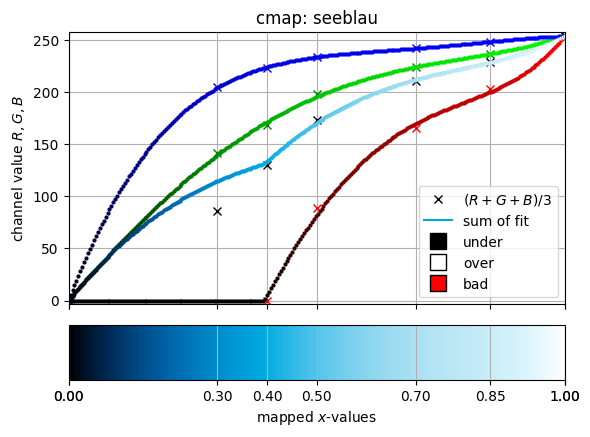

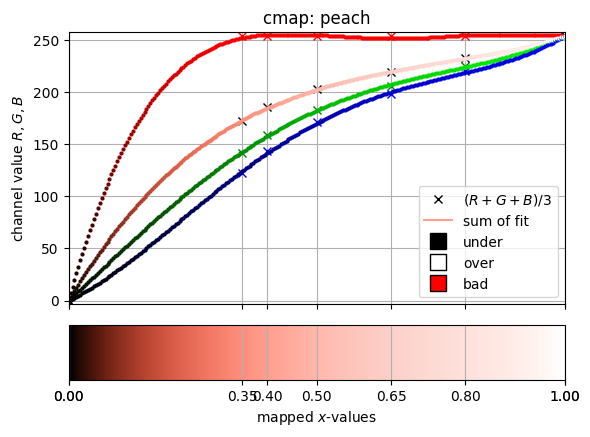

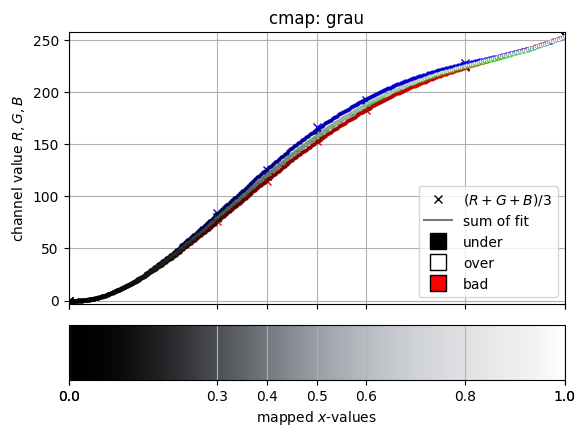

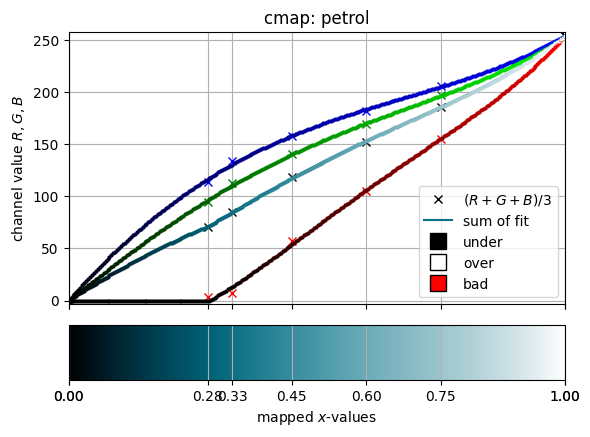

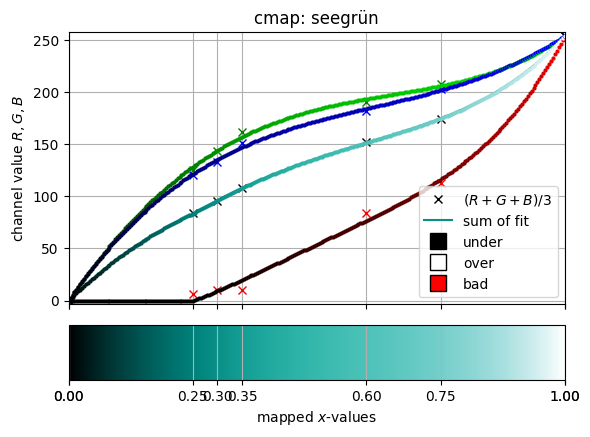

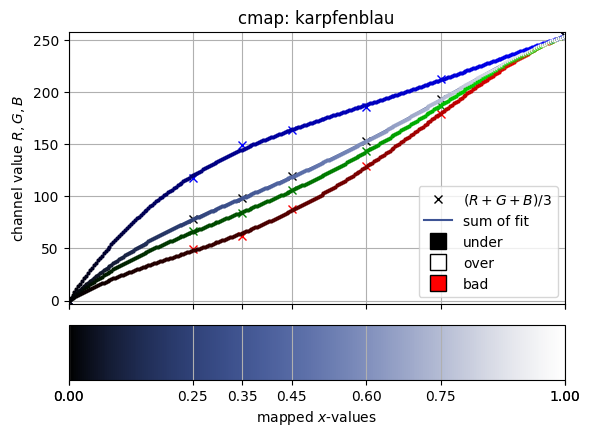

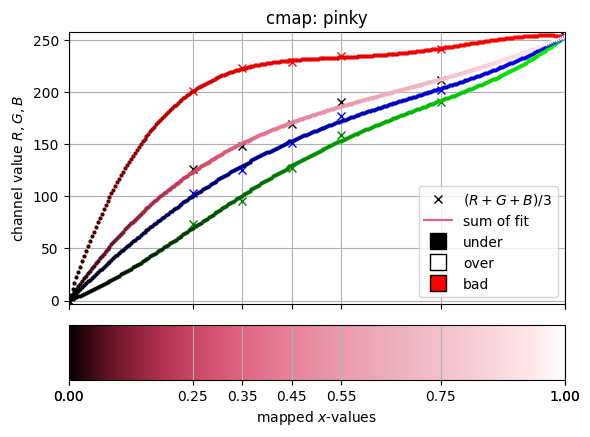

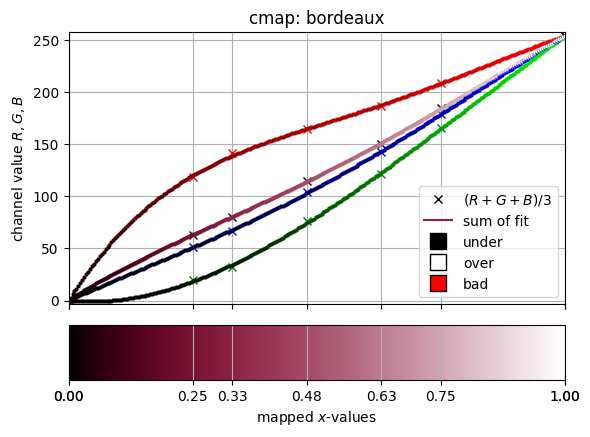

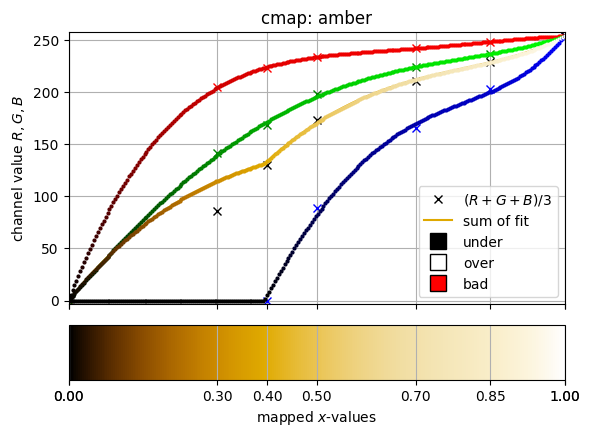

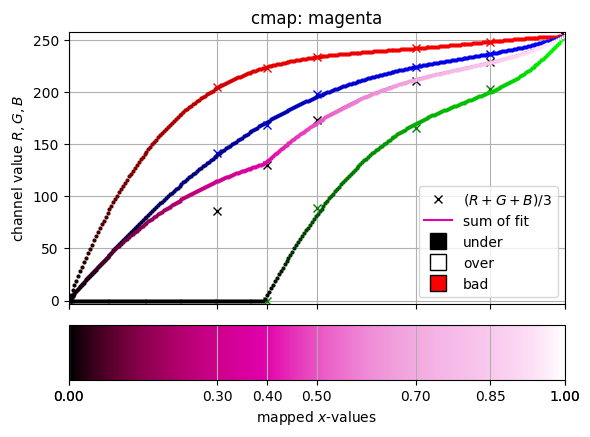

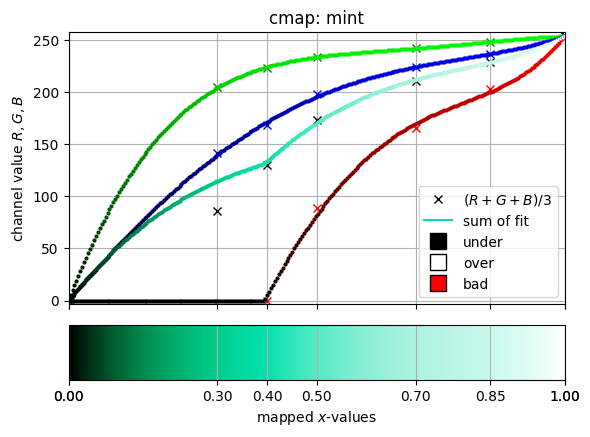

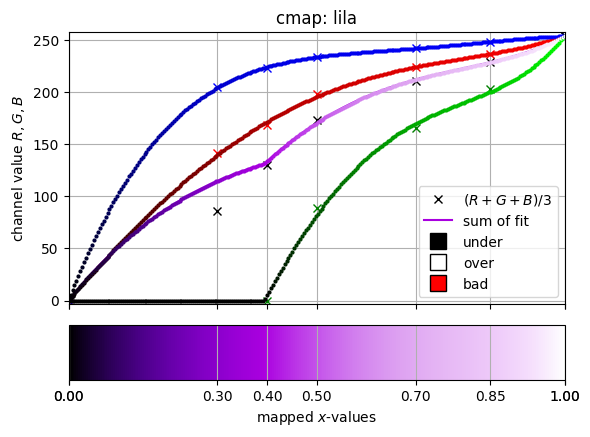

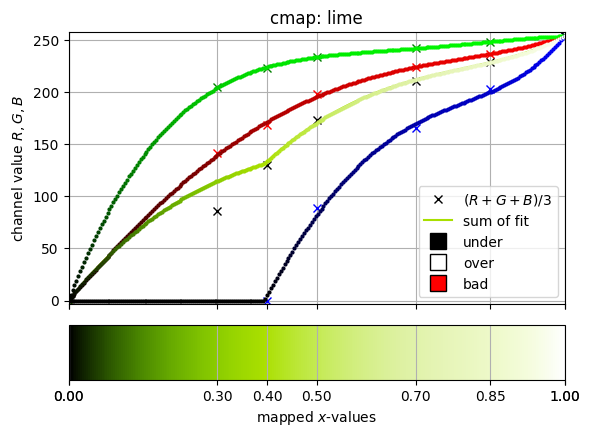

In [110]:
for i, color in enumerate(DATABASE.keys()):
    a = cmap(color=color, clim=(0,1), plot=True, num=i)

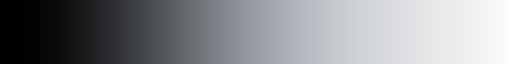

In [9]:
cmap(color='seegrau', clim=(0,1), inverse=False, plot=False)
cmap(color='seegrau', clim=(0,1), inverse=False, plot=False)

# COLORS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[3, 1, 4, 2, 5]
3
[2, 4, 1, 3, 5]
2
[3, 1, 4, 2, 5]
3
[2, 4, 1, 3, 5]
2
[2, 4, 1, 3, 5]
2
[2, 4, 1, 3, 5]
2
[2, 4, 1, 3, 5]
2
[2, 4, 1, 3, 5]
2
[3, 1, 4, 2, 5]
1
[2, 4, 1, 3, 5]
4
[3, 1, 4, 2, 5]
1
[2, 4, 1, 3, 5]
4
[2, 4, 1, 3, 5]
4
[2, 4, 1, 3, 5]
4
[2, 4, 1, 3, 5]
4
[2, 4, 1, 3, 5]
4
[3, 1, 4, 2, 5]
4
[2, 4, 1, 3, 5]
1
[3, 1, 4, 2, 5]
4
[2, 4, 1, 3, 5]
1
[2, 4, 1, 3, 5]
1
[2, 4, 1, 3, 5]
1
[2, 4, 1, 3, 5]
1
[2, 4, 1, 3, 5]
1
[3, 1, 4, 2, 5]
2
[2, 4, 1, 3, 5]
3
[3, 1, 4, 2, 5]
2
[2, 4, 1, 3, 5]
3
[2, 4, 1, 3, 5]
3
[2, 4, 1, 3, 5]
3
[2, 4, 1, 3, 5]
3
[2, 4, 1, 3, 5]
3
[3, 1, 4, 2, 5]
5
[2, 4, 1, 3, 5]
5
[3, 1, 4, 2, 5]
5
[2, 4, 1, 3, 5]
5
[2, 4, 1, 3, 5]
5
[2, 4, 1, 3, 5]
5
[2, 4, 1, 3, 5]
5
[2, 4, 1, 3, 5]
5


({'x': array([0.  , 0.3 , 0.4 , 0.5 , 0.7 , 0.85, 1.  ]),
  'R': array([-1.390625  , -0.34765625,  0.        ,  0.34765625,  0.6484375 ,
          0.796875  ,  0.99609375]),
  'G': array([0.        , 0.5546875 , 0.66015625, 0.77734375, 0.87890625,
         0.9296875 , 0.99609375]),
  'B': array([0.        , 0.8046875 , 0.875     , 0.91796875, 0.953125  ,
         0.97265625, 0.99609375]),
  'leading color': [3, 1, 4, 2, 5],
  'polyRcoeff': array([  9.70327344, -20.16270112,  11.19191594,   1.65655683,
          -1.39070895]),
  'polyGcoeff': array([ 1.20395462e+00, -1.61506499e+00, -7.63673769e-01,  2.17041593e+00,
          2.43156566e-04]),
  'polyBcoeff': array([-3.05891795e+00,  9.09054042e+00, -9.96060078e+00,  4.92423725e+00,
          1.85269387e-04])},
 {'x': array([0.  , 0.35, 0.4 , 0.5 , 0.65, 0.8 , 1.  ]),
  'R': array([0.        , 0.99609375, 0.99609375, 0.99609375, 0.99609375,
         0.99609375, 0.99609375]),
  'G': array([0.        , 0.5546875 , 0.625     , 0.71875   , 

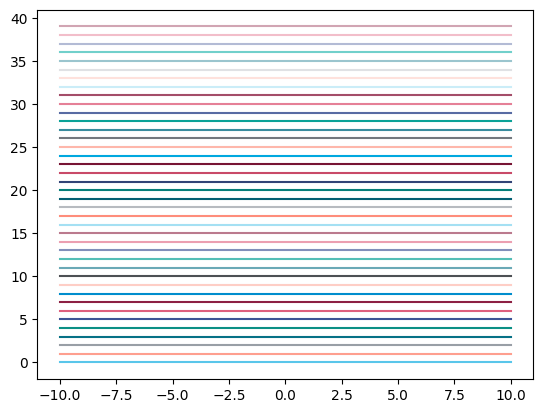

In [ ]:
# initialize stuff
%load_ext autoreload
%autoreload 2
%matplotlib inline
from corporate_design_colors_v4 import DATABASE

seeblau = DATABASE['seeblau']
peach = DATABASE['peach']

COLORS = []
color_keys = ['seeblau', 'peach', 'grau', 'petrol', 'seegrün', 'karpfenblau', 'pinky', 'bordeaux']
# color_keys = ['seeblau', 'amber', 'magenta', 'mint', 'lila', 'lime']

for i in range(5):
    for color_key in color_keys:
        database = DATABASE[color_key]
        index = database['leading color'][i]
        COLORS.append((max(0, database['R'][index]), max(0, database['G'][index]), max(0, database['B'][index])))

import matplotlib.pyplot as plt
for i, color in enumerate(COLORS):
    plt.plot([-10,10], [i, i], color=color)

seeblau, peach